# 1.1「pre-trained VGG모델」 사용 방법

- 학습된 VGG모델을 통해, 알 수 없는 이미지(골든 리트리버) 분류


# 학습목표

1.	PyTorch의 ImangeNet 데이터셋에서 학습된 모델을 로드
2.	VGG 모델의 구조 이해
3.	입력 이미지의 전처리(사이즈, 컬러) 변환



# 사전준비

1. 데이터셋 준비、make_folders_and_data_downloads.ipynb

2. PyTorch 설치（ https://pytorch.org/get-started/locally/ ）、PyTorch1.0 이상 설치

    conda install pytorch-cpu torchvision-cpu -c pytorch

3. Matplotlib설치
conda install -c conda-forge matplotlib 


# 패키지 import 및 PyTorch 버전 확인

In [22]:
# 패키지 import
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms


In [23]:
# PyTorch 버전확인
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)


PyTorch Version:  1.10.0
Torchvision Version:  0.11.1


# pre_trained된 VGG-16 모델 읽기

In [24]:
# VGG-16 모델의 인스턴스 생성

use_pretrained = True  # 학습된 파라미터 사용
vgg16_net = models.vgg16(pretrained=use_pretrained)
vgg16_net.eval()  # 평가 모드로 설정

# 모델의 네트워크 구성
print(vgg16_net)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 입력 영상의 전처리 class 작성

In [25]:
# 전처리 clas
class BaseTransform():
    """
    이미지 크기 변경 및 색상 표준화

    Attributes
    ----------
    resize : int
        크기 변경 전의 이미지 크기
    mean : (R, G, B)
        각 생상 채널의 평균값
    std : (R, G, B)
        각 색상 채널의 표준편차
    """

    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),  # 짧은 변의 길이가 resize 크기로 변환
            transforms.CenterCrop(resize),  # 이미지 중앙을 resize × resize로 자름
            transforms.ToTensor(),  # Torch 텐서로 변환
            transforms.Normalize(mean, std)  # 색상 표준화
        ])

    def __call__(self, img):
        return self.base_transform(img)


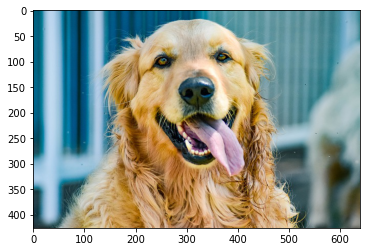

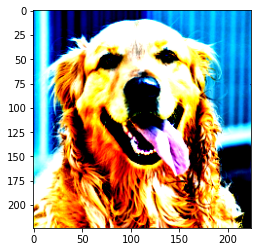

In [26]:
# 전처리 진행

# 1. 데이터 불러오기
image_file_path = './data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)  # [높이][너비][RGB]

# 2. 원본 이미지 표시
plt.imshow(img)
plt.show()

# 3. 이미지 전처리 및 변경 후 이미지 표시
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)  # torch.Size([3, 224, 224])

# (색상、높이、너비)를 (높이、너비、색상)으로 변환하고、0-1로 값을 제한
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()


# 출력 결과로 라벨을 예측하는 후처리 클래스 생성

In [27]:
# ILSVRC 라벨 정보 load
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))
ILSVRC_class_index


{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [28]:
# 출력 결과에서 라벨을 예측하는 후처리 클래스
class ILSVRCPredictor():
    """
    ILSVRC 데이터 모델의 출력에서 라벨을 구함

    Attributes
    ----------
    class_index : dictionary
            클래스 index와 라벨명을 대응시킨 사전형 변수
    """

    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
        """
        최대 확률의 ILSVRC 라벨명을 가져온다.

        Parameters
        ----------
        out : torch.Size([1, 1000])
            Net에서 출력

        Returns
        -------
        predicted_label_name : str
            가장 예측 확률이 높은 라벨명
        """
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]

        return predicted_label_name


# 학습된 VGG 모델로 이미지 예측

In [29]:
# ILSVRC 라벨 정보를 읽어 사전형 변수 생성
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))

# ILSVRCPredictor 인스턴스 생성
predictor = ILSVRCPredictor(ILSVRC_class_index)

# 입릭 이미지 읽기
image_file_path = './data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)  # [높이][너비][RGB]

# 전처리 후 배치 크기의 차원 추가
transform = BaseTransform(resize, mean, std)  # 전처리 클래스 작성
img_transformed = transform(img)  # torch.Size([3, 224, 224])
inputs = img_transformed.unsqueeze_(0)  # torch.Size([1, 3, 224, 224])

# 모델에 입력하고 모델 출력을 라벨로 변환
out = vgg16_net(inputs)  # torch.Size([1, 1000])
result = predictor.predict_max(out)

# 예측 결과 출력
print("입력 이미지의 예측 결과：", result)


입력 이미지의 예측 결과： golden_retriever
